In [1]:
import numpy as np
from scipy import stats
import itertools
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def CI(x, y, z=None):

    df = len(x) - 2
    # print z.shape, len(z)
    if z is not None and z.shape[1] > 0:
        assert np.ndim(z) > 1
        df -= z.shape[1]
        beta_hat_x = np.linalg.lstsq(z, x, rcond=None)[0]
        xresid = x - np.dot(z, beta_hat_x)
        beta_hat_y = np.linalg.lstsq(z, y, rcond=None)[0]
        yresid = y - np.dot(z, beta_hat_y)
    else:
        xresid = x
        yresid = y
    
    value = np.corrcoef(xresid, yresid)[0,1]

    # Two-sided significance level
    trafo_val = value * np.sqrt(df / (1. - value**2))
    pval = stats.t.sf(np.abs(trafo_val), df) * 2

    return pval, value

In [3]:
def youralg_skeleton(X, sig_level=0.1, pmax = 100, qmax = 100, verbosity=0):

    N = X.shape[1]

    # Form complete graph
    graph = np.ones((N, N), dtype='int')
    graph[range(N),range(N)] = 0

    # Define adj
    adj = get_adj(graph)

        # print [len(adj[j]) for j in range(N)]
    if verbosity > 0:
        print (graph)

    for i in range(N):
      for j in range(i+1, N):
        if verbosity > 0:
            print ("\n\t%d -- %d" %(i, j))

        #  conditions = list(itertools.combinations([l for l in range(N) if l != i and l != j], p))

        S = []
        if len(S) > 0: z = X[:,S]
        z = None
        testpval = CI(x=X[:,i], y=X[:,j], z=z)[0]
        if verbosity > 0:
            print ("\t\t%d ci %d | %s : p=%.4f %s" %(i, j, S, testpval, {0:'dep', 1:'indep'}[testpval > sig_level]))
        if testpval > sig_level:
            graph[i,j] = graph[j,i] = 0

#             break

    if verbosity > 0:
        print("Updated graph")
        print (graph)
    # print sepset

        # print "updated ", adj
    return {'graph':graph}
#             'sepset':sepset}

In [4]:
def get_adj(graph):
    N = len(graph)
    return dict([(j, list(np.where(graph[:,j] != 0)[0])) for j in range(N)])

In [5]:
def skeleton(graph):
    skele = np.copy(graph + graph.transpose())
    return (skele > 0).astype('bool').astype('int')

In [6]:
def models(index, n_obs=10000):

    if index == 1:
        X = np.random.randn(n_obs, 4)
        X[:,2] += X[:,1]
        X[:,3] += X[:,2]

        true = np.zeros((4, 4), dtype='int')
        true[1,2] = 1
        true[2,3] = 1
        return X, true

    if index == 2:
        X = np.random.randn(n_obs, 4)
        X[:,1] += X[:,2]
        X[:,3] += X[:,2]

        true = np.zeros((4, 4), dtype='int')
        true[2,1] = 1
        true[2,3] = 1
        return X, true

    if index == 3:
        X = np.random.randn(n_obs, 4)
        X[:,2] += X[:,1] + X[:,3]

        true = np.zeros((4, 4), dtype='int')
        true[1,2] = 1
        true[3,2] = 1
        return X, true

    if index == 4:
        X = np.random.randn(n_obs, 4)
        X[:,1] += X[:,0]
        X[:,2] += X[:,0]
        X[:,3] += X[:,1] + X[:,2] 

        true = np.zeros((4, 4), dtype='int')
        true[0,1] = 1
        true[0,2] = 1
        true[1,3] = 1
        true[2,3] = 1

        return X, true

    if index == 5:
        X = np.random.randn(n_obs, 4)
        X[:,3] += X[:,1] + X[:,2]
        X[:,0] += X[:,1] + X[:,2] 

        true = np.zeros((4, 4), dtype='int')
        true[1,3] = 1
        true[1,0] = 1
        true[2,3] = 1
        true[2,0] = 1

        return X, true

    if index == 6:
        X = np.random.randn(n_obs, 5)
        X[:,4] += X[:,2] + X[:,3]
        X[:,1] += X[:,2] + X[:,3] 
        X[:,0] += X[:,1] + X[:,4] 
        
        true = np.zeros((5, 5), dtype='int')
        true[3,4] = 1
        true[2,4] = 1
        true[2,1] = 1
        true[3,1] = 1
        true[1,0] = 1
        true[4,0] = 1

        return X, true


    if index == 7:
        X = np.random.randn(n_obs, 4)
        X[:,1] += X[:,0]
        X[:,3] += X[:,0]
        X[:,2] += 0.5*X[:,0] + 0.5*X[:,1] + 0.5*X[:,3] 

        true = np.zeros((4, 4), dtype='int')
        true[0,1] = 1
        true[0,2] = 1
        true[0,3] = 1
        true[3,2] = 1
        true[1,2] = 1

        return X, true

    if index == 8:
        X = np.random.randn(n_obs, 5)
        X[:,4] += 0.5*X[:,2] + 0.4*X[:,3]
        X[:,1] += 0.5*X[:,2] + 0.4*X[:,3] 
        X[:,0] += 0.5*X[:,1] + 0.6*X[:,4] 
        X[:,3] += 2.*X[:,2] #+ X[:,4] 

        true = np.zeros((5, 5), dtype='int')
        true[3,4] = 1
        true[2,4] = 1
        true[2,1] = 1
        true[3,1] = 1
        true[1,0] = 1
        true[4,0] = 1
        true[2,3] = 1

        return X, true

    if index == 9:
        X = np.random.randn(n_obs, 15)
        X[:,4] += 0.5*X[:,2] + 0.4*X[:,3]
        X[:,1] += 0.5*X[:,2] + 0.4*X[:,3] 
        X[:,0] += 0.5*X[:,1] + 0.6*X[:,4] 

        true = np.zeros((15, 15), dtype='int')
        true[3,4] = 1
        true[2,4] = 1
        true[2,1] = 1
        true[3,1] = 1
        true[1,0] = 1
        true[4,0] = 1

        return X, true

In [7]:
np.random.seed(42)

[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]

	0 -- 1
		0 ci 1 | [] : p=0.8717 indep

	0 -- 2
		0 ci 2 | [] : p=0.8563 indep

	0 -- 3
		0 ci 3 | [] : p=0.3188 indep

	1 -- 2
		1 ci 2 | [] : p=0.0000 dep

	1 -- 3
		1 ci 3 | [] : p=0.0000 dep

	2 -- 3
		2 ci 3 | [] : p=0.0000 dep
Updated graph
[[0 0 0 0]
 [0 0 1 1]
 [0 1 0 1]
 [0 1 1 0]]


/Users/Oana/python_virtual_envs/kausale_inferenz_virtualenv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


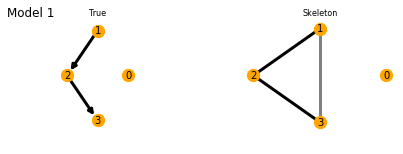

In [8]:
for index in [1]: # [1,2,3,4,5,6]:
    X, graph_true = models(index, n_obs=10000)

    result = youralg_skeleton(X, sig_level=0.00001, verbosity=1)

    graph1_est = result['graph']
#     sepset = result['sepset']

    # Plot true graph
    G = nx.DiGraph(graph_true)
    fig = plt.figure(figsize=(6, 2))
    ax = fig.add_subplot(141)
    nx.draw(G, fig=fig, ax=ax, node_color='orange', 
        labels = dict([(i, i) for i in range(len(graph_true))]),
        # edge_color=edge_color,
        node_size=150,
        width=3.,
        font_size=10,
        pos=nx.circular_layout(G),
        )
    ax.set_title("True", fontsize=8)

    # Plot skeleton results
    G = nx.Graph(skeleton(graph_true) | (graph1_est))
    edge_color = []
    for ij in G.edges():
        # print ij, skeleton(true)[ij], skeleton(estimated)[ij]
        if skeleton(graph_true)[ij] == 1 and skeleton(graph1_est)[ij] == 1:
            edge_color.append('black')
        elif skeleton(graph_true)[ij] == 1 and skeleton(graph1_est)[ij] == 0:
            edge_color.append('red')
        elif skeleton(graph_true)[ij] == 0 and skeleton(graph1_est)[ij] == 1:
            edge_color.append('grey')

    # fig = plt.figure(figsize=(6, 2))
    ax = fig.add_subplot(122)
    nx.draw(G, fig=fig, ax=ax, node_color='orange', 
        labels = dict([(i, i) for i in range(len(graph_true))]),
        edge_color=edge_color,
        node_size=150,
        width=3.,
        font_size=10,
        pos=nx.circular_layout(G),
        )
    ax.set_title("Skeleton", fontsize=8)
    # fig.suptitle('Model %s skeleton' %index, x=0, fontsize=20, horizontalalignment='left')
    # fig.savefig('/home/rung_ja/work/lectures/FSU_causal_inference/code/model_%d_skeleton.pdf'%index)

    fig.suptitle('Model %s' %index, x=0, fontsize=12, horizontalalignment='left')
    fig.savefig('./model_%d.pdf'%index)

    # print graph_true
    # print graph1_est
    # print graph3_est